In [1]:
import pandas as pd
df=pd.read_csv('tvmarketing.csv')
print(df.head(5))

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [9]:
print(df.dtypes)

TV       float64
Sales    float64
dtype: object


In [13]:
h=df.shape
print(h)


(200, 2)


In [14]:
print(df.describe())

               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


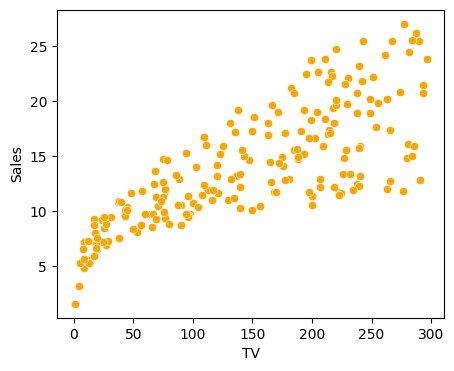

In [27]:
from matplotlib import pyplot as plt
import seaborn as s
plt.figure(figsize=(5,4))
s.scatterplot(x=df['TV'],y=df['Sales'],color='orange')
plt.show()


In [31]:
x=df[['TV']]
y=df['Sales']
#print(x.head())
#print(y.head())
print(x,y)

        TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
..     ...
195   38.2
196   94.2
197  177.0
198  283.6
199  232.1

[200 rows x 1 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)#we can also use test size ie test =0.3 train 0.7
print(x_train)
print(x_test)
print(y_train)
print(y_test)

        TV
72    26.8
193  166.8
126    7.8
150  280.7
36   266.9
..     ...
15   195.4
135   48.3
138   43.0
50   199.8
196   94.2

[140 rows x 1 columns]
        TV
189   18.7
187  191.1
29    70.6
182   56.2
90   134.3
61   261.3
37    74.7
43   206.9
73   129.4
144   96.2
185  205.0
169  284.3
51   100.4
54   262.7
75    16.9
107   90.4
0    230.1
33   265.6
183  287.6
4    180.8
94   107.4
175  276.9
108   13.1
198  283.6
152  197.6
115   75.1
143  104.6
103  187.9
86    76.3
123  123.1
96   197.6
56     7.3
154  187.8
167  206.8
197  177.0
89   109.8
31   112.9
45   175.1
57   136.2
41   177.0
34    95.7
68   237.4
127   80.2
119   19.4
69   216.8
177  170.2
10    66.1
191   75.5
102  280.2
74   213.4
112  175.7
125   87.2
24    62.3
99   135.2
170   50.0
16    67.8
65    69.0
148   38.0
159  131.7
111  241.7
72      8.8
193    19.6
126     6.6
150    16.1
36     25.4
       ... 
15     22.4
135    11.6
138     9.6
50     11.4
196     9.7
Name: Sales, Length: 140, dtype: float64


In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140,)
(60,)


In [55]:
import numpy as np
xtrainnp=x_train.values.flatten()
ytrainnp=y_train.values
x_mean=np.mean(xtrainnp)
y_mean=np.mean(ytrainnp)
numerator=np.sum((xtrainnp-x_mean)*(ytrainnp-y_mean))
denominator=np.sum((xtrainnp-x_mean)**2)
b1=numerator/denominator
bo=y_mean-b1*x_mean
print("slope:",b1)
print("intercept:",bo)


slope: 0.04541849059234767
intercept: 7.348960283692419


In [65]:
x_testnp=x_test.values.flatten()
y_pred=bo+b1*x_testnp
print(y_pred[:5])

[ 8.19828606 16.02843384 10.55550572  9.90147945 13.44866357]


In [75]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
intercept=reg.intercept_
coeff=reg.coef_
#print(intercept,coeff)
new_tv = np.array([[265.6]])
predicted_price = reg.predict(new_tv)
print(f"Predicted Price for the tv {new_tv[0]}: ${predicted_price[0]:.2f}")

Predicted Price for the tv [265.6]: $19.41


/home/user/jupyter_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [70]:
print(intercept,coeff)

7.348960283692419 [0.04541849]


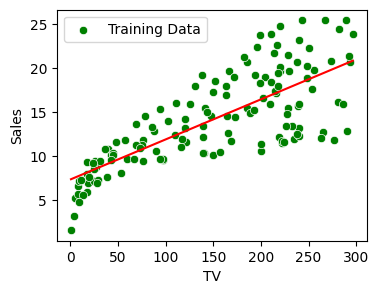

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,3))
sns.scatterplot(x=x_train["TV"], y=y_train, label="Training Data", color="green")
xval=np.linspace(x_train.min(),x_train.max(),100)
yval=bo+b1*xval
plt.plot(xval,yval,color='red')
plt.show()


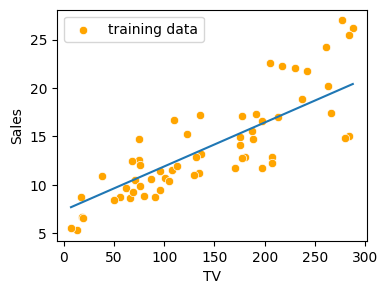

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,3))
sns.scatterplot(x=x_test['TV'],y=y_test,label="training data",color='orange')
xval=np.linspace(x_test.min(),x_test.max(),200)
yval=bo+b1*xval
plt.plot(xval,yval)
plt.show()